# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [4]:
import pandas as pd

data = pd.read_csv('C:\\Users\\adams\\OneDrive\\Documents\\Git\\ml-notebooks\\data\\clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

### Use PCA to create a 2D version of the features for visualization

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(data)

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

### Visualize the unclustered data points

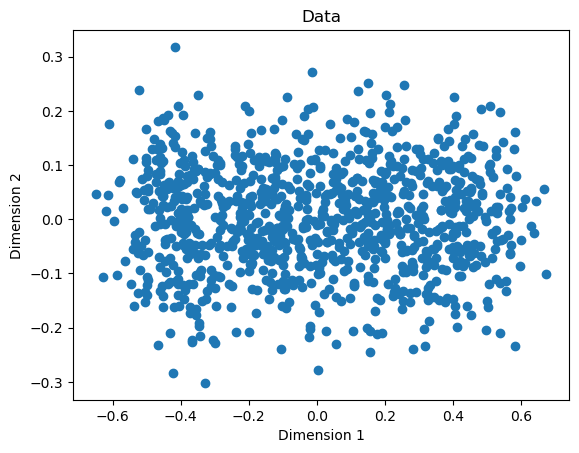

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

### Calculate WCSS for multiple cluster numbers to determine the right number of clusters

Text(0.5, 1.0, 'WCSS by Clusters')

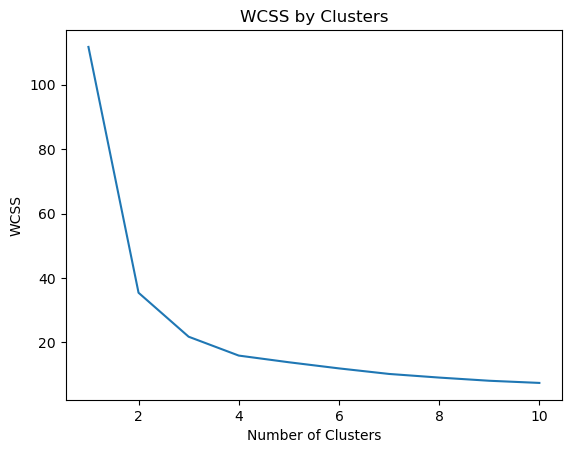

In [13]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters, measuring "inertia"
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(features_2d)
    wcss.append(model.inertia_)

# visualise elbow
plt.plot(np.arange(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("WCSS by Clusters")

### Use K-Means

In [14]:
from sklearn.cluster import KMeans

# Create a model based on 4 centroids, spreading out evening to begin, re-running 500 times, and limiting each time to 1000 revisions.
model = KMeans(n_clusters=4, init='k-means++', n_init=500, max_iter=1500)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(data)
# View the cluster assignments
km_clusters


array([3, 3, 2, 2, 3, 3, 2, 1, 3, 3, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 3, 1,
       3, 3, 1, 0, 2, 3, 0, 1, 0, 3, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2, 0,
       2, 3, 3, 2, 2, 1, 3, 0, 2, 2, 2, 2, 1, 3, 2, 3, 3, 3, 3, 3, 1, 1,
       0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 3, 0, 1, 0, 2, 0, 1, 2, 0, 1,
       1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2,
       1, 0, 3, 3, 0, 2, 0, 2, 3, 0, 1, 0, 2, 2, 3, 1, 0, 1, 2, 3, 0, 0,
       0, 1, 0, 0, 1, 3, 1, 0, 3, 0, 0, 3, 2, 2, 1, 2, 1, 1, 2, 3, 3, 1,
       3, 0, 3, 1, 1, 1, 0, 3, 2, 2, 1, 0, 0, 3, 3, 2, 3, 0, 1, 2, 1, 0,
       0, 1, 1, 3, 1, 3, 0, 0, 1, 2, 3, 2, 2, 0, 0, 3, 0, 1, 2, 0, 1, 1,
       3, 2, 0, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 0, 3, 2, 1, 1, 2, 3, 2,
       1, 3, 0, 2, 0, 1, 0, 3, 0, 3, 1, 3, 0, 1, 3, 2, 2, 3, 2, 0, 2, 0,
       2, 1, 1, 0, 2, 3, 3, 1, 2, 1, 0, 0, 2, 2, 2, 3, 2, 3, 1, 2, 2, 1,
       3, 1, 0, 0, 0, 1, 2, 3, 1, 0, 3, 0, 2, 1, 1, 3, 2, 2, 0, 3, 3, 2,
       2, 0, 2, 3, 3, 0, 3, 2, 2, 2, 1, 1, 0, 3, 2,

### Plot the clustered points

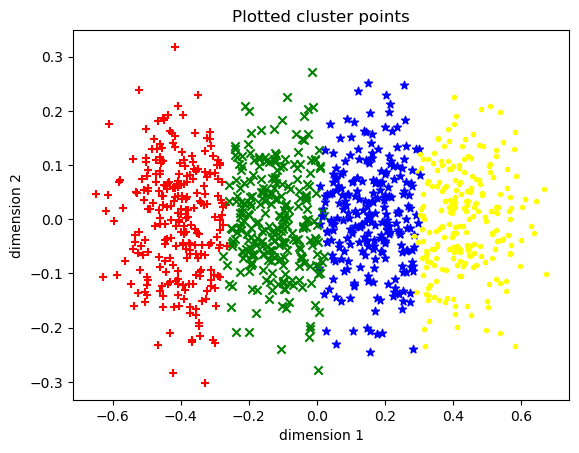

In [35]:
# define function to take 2D reduced samples and cluster predictions and return graph
def plot_clusters(pca_samples, clusters):
    color_dict = {0: "blue", 1: "green", 2:"red", 3:"yellow"}
    marker_dict = {0:'*',1:'x',2:'+', 3:'.'}
    color_list = [color_dict[i] for i in clusters]
    marker_list = [marker_dict[i] for i in clusters]
    for i in range(len(clusters)):
        plt.scatter(pca_samples[i][0], pca_samples[i][1], c=color_list[i], marker=marker_list[i])
        plt.title("Plotted cluster points")
        plt.xlabel("dimension 1")
        plt.ylabel("dimension 2")

plot_clusters(features_2d, km_clusters)

### Try aggromerative clustering

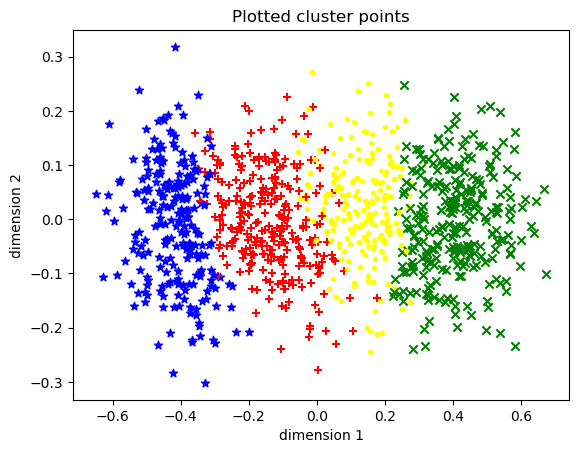

In [36]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)
agg_clusters = model.fit_predict(data)
agg_clusters

plot_clusters(features_2d, agg_clusters)